## Loan Defaulter Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
# application data
data = pd.read_csv('\loan_data\application_data.csv')

# previous applicaiton data
pdata = pd.read_csv('\loan_data\previous_application.csv')

### Inspecting application data

In [3]:
data.shape

(307511, 122)

122 columns is a lot!! Better start checking the null values.

In [4]:
data.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

With this many columns, we can clearly see the null values if we convert it to dataframe. Will be useful further.

### Handling Missing Values

In [5]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending=False))
missing

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_MEDI,213514
...,...
REG_CITY_NOT_LIVE_CITY,0
LIVE_REGION_NOT_WORK_REGION,0
REG_REGION_NOT_WORK_REGION,0
HOUR_APPR_PROCESS_START,0


We can see that the index is of col name, so let's reset the index

In [6]:
missing.reset_index(inplace=True)

In [7]:
missing.head()

,index,0
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_MEDI,213514


Now that we have our missing values dataframe, we can start dealing with them. 

But before that we need a percentage column to analyze the missing values more accurately

In [8]:
missing.rename(columns={'index':'column',0:'null_count'},inplace=True)
missing['percent'] = missing['null_count']/data.shape[0]

In [9]:
missing.head()

,column,null_count,percent
0,COMMONAREA_MEDI,214865,0.698723
1,COMMONAREA_AVG,214865,0.698723
2,COMMONAREA_MODE,214865,0.698723
3,NONLIVINGAPARTMENTS_MODE,213514,0.694330
4,NONLIVINGAPARTMENTS_MEDI,213514,0.694330


In [10]:
missing[missing.percent>0.4].shape[0]

49

So we see that there are 49 columns with atleast 40 percent of data is missing!! 
I believe this kind of data will not make much sense even by imputation, so decided to remove those columns.

In [11]:
data.drop(missing[missing.percent>0.4]['column'].values,axis=1,inplace=True)

In [12]:
data.shape

(307511, 73)

So previously we had 122 columns, and now we removed 40 columns as they atleast 50 percent of data missing, so we are left out with 81 columns.

In [13]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Investigating the columns

#### At first glance we can see that there are some columns with that starts with FLAG, so we can investigate them first

In [14]:
cols_with_flag = data.columns[data.columns.str.startswith('FLAG')]

In [15]:
flag_cols_data = data[np.concatenate([cols_with_flag,np.array(['TARGET'])])]

In [16]:
cols_with_flag

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

#### Visualizing how each FLAG Column impact the target

Observing the correlation for these columns

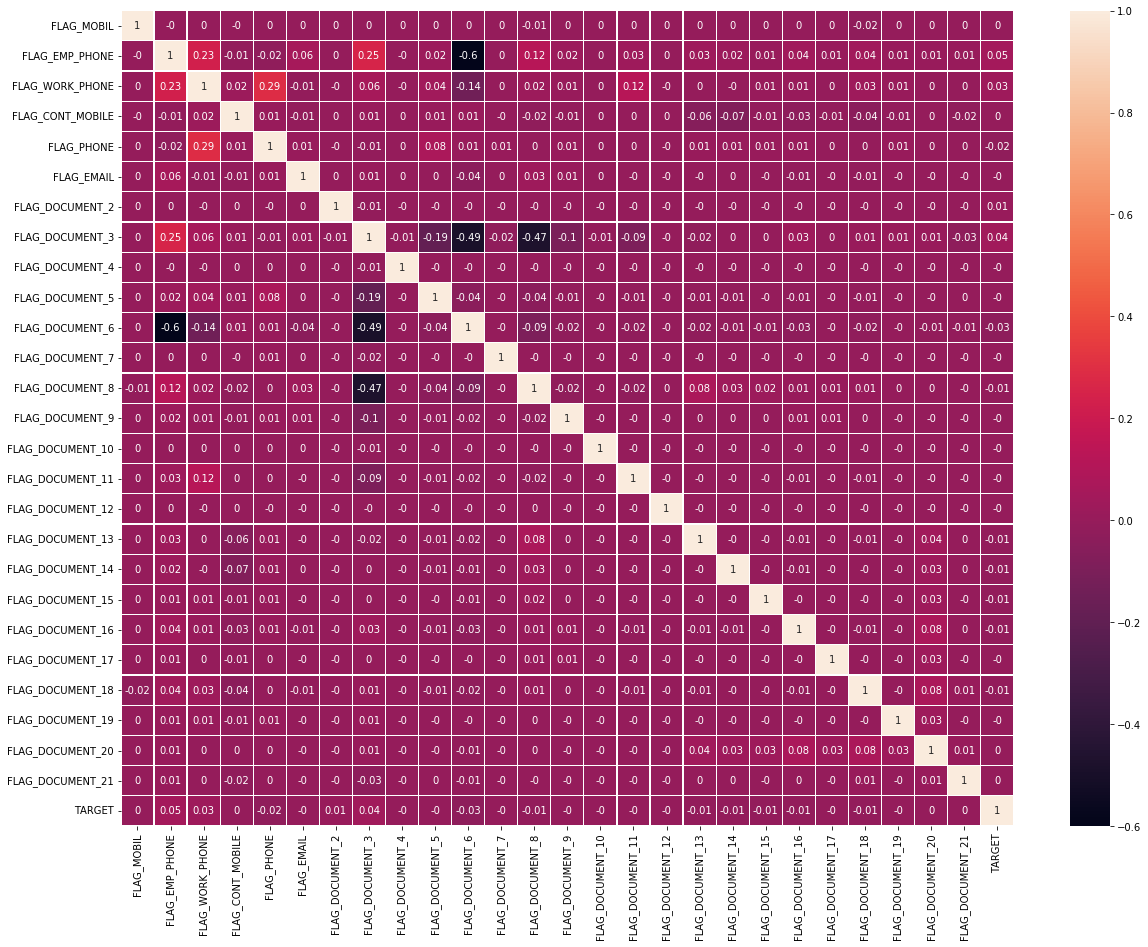

In [17]:
plt.figure(figsize=(20,15))
corr_matrix = round(flag_cols_data.corr(),2)
sns.heatmap(corr_matrix,linewidth=0.2,annot=True)

As we can see that they have very less correlation with the target, which is totally insignificant, hence we can remove them.

In [18]:
data.drop(cols_with_flag,axis=1,inplace=True)

In [19]:
data.shape

(307511, 45)

#### Checking if any other columns can be removed

In [20]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [22]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending=False))
missing.reset_index(inplace=True)
missing.rename(columns={'index':'column',0:'null_count'},inplace=True)
missing['percent'] = missing['null_count']/data.shape[0]
missing

,column,null_count,percent
0,OCCUPATION_TYPE,96391,0.313455
1,EXT_SOURCE_3,60965,0.198253
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
3,AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
4,AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
5,AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
6,AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
7,AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
8,NAME_TYPE_SUITE,1292,0.004201
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320


In [23]:
missing[missing.percent>0.4]

,column,null_count,percent


Still we can see few columns that are almost 50 percent null values, we can remove them as well.

In [24]:
data.drop(missing[missing.percent>0.4].column.values,axis=1,inplace=True)

In [25]:
data.shape

(307511, 45)

## Feature Engineering

In [26]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
NAME_CONTRACT_TYPE                 0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
CODE_GENDER                        0
REGION_POPULATION_RELATIVE         0
T

### Dealing Missing values of Numeric Variables

The mean is used for normal number distributions, which have a low amount of outliers. 

If there are more outliers in the data, then median is generally used as it returns the central tendency for skewed number distributions.

we can deal column wise for the rest of missing values, and if we see from the last we have 

**DAYS_LAST_PHONE_CHANGE**

In [27]:
data['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

In [28]:
data.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

**CNT_FAM_MEMBERS Column** 

As there is only one row with null value, decided to remove it.

In [29]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna((data['CNT_FAM_MEMBERS'].mode()[0]))

In [30]:
data['CNT_FAM_MEMBERS'].isnull().sum()

0

**AMT_Annuity Column** 

In [31]:
data['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307510, dtype: float64

In [32]:
data['AMT_ANNUITY'].isna().sum()

12

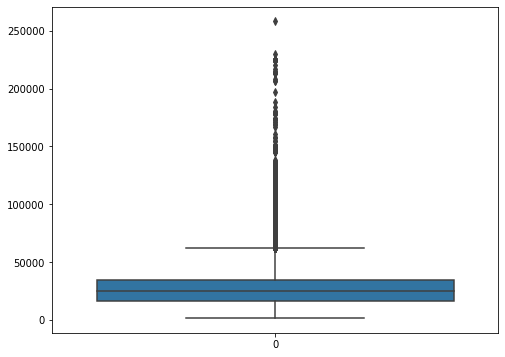

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(data['AMT_ANNUITY'])

Observing that it has significant amount of outliers, decided to impute with median

In [34]:
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna((data['AMT_ANNUITY'].median()))

In [35]:
data['AMT_ANNUITY'].isna().sum()

0

**AMT_GOODS_PRICE Column**

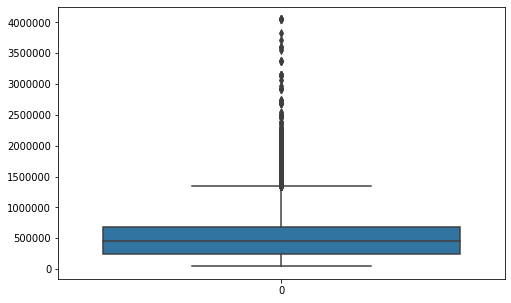

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data['AMT_GOODS_PRICE'])

Observing that it has significant amount of outliers, decided to impute with median

In [37]:
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna((data['AMT_GOODS_PRICE'].median()))

In [38]:
data['AMT_GOODS_PRICE'].isna().sum()

0

In [39]:
# Fill with median value
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna((data['AMT_GOODS_PRICE'].median()))

### Dealing Missing Values of Categorical Variables

In [40]:
# Fill missing values with a new class 'Unknown'
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('Unknown')

In [41]:
# Fill the missing values with mode
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna((data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna((data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]))

In [42]:
# NAME_TYPE_SUITE
data['NAME_TYPE_SUITE'].value_counts()

# 'Unaccompanied' class is purely dominating the distribution. So, we use it to fill the missing values
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna((data['NAME_TYPE_SUITE'].mode()[0]))

In [43]:
data.isna().sum().sort_values(ascending=False).head(20)

EXT_SOURCE_3                  60964
AMT_REQ_CREDIT_BUREAU_YEAR    41518
AMT_REQ_CREDIT_BUREAU_MON     41518
AMT_REQ_CREDIT_BUREAU_WEEK    41518
AMT_REQ_CREDIT_BUREAU_DAY     41518
AMT_REQ_CREDIT_BUREAU_HOUR    41518
AMT_REQ_CREDIT_BUREAU_QRT     41518
EXT_SOURCE_2                    659
NAME_TYPE_SUITE                   0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
AMT_CREDIT                        0
AMT_GOODS_PRICE                   0
AMT_ANNUITY                       0
DAYS_ID_PUBLISH                   0
dtype: int64

### Dealing with columns related to date

In [44]:
data[data['AMT_REQ_CREDIT_BUREAU_DAY'].isna()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,...,0.0,0.0,0.0,-188.0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,...,0.0,4.0,0.0,-2811.0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,...,0.0,0.0,0.0,-296.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Fetching the columns
amt_req = []  

for k in data.columns:
    if k.startswith('AMT_REQ_CREDIT_BUREAU_'):
        amt_req.append(k)  # Add features to list
        
amt_req
        

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [46]:
# Impute missing values with median
for col in amt_req:
    data[col] = data[col].fillna((data[col].median()))

In [47]:
data.isna().sum().sort_values(ascending=False).head(20)

EXT_SOURCE_3                  60964
EXT_SOURCE_2                    659
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
AMT_REQ_CREDIT_BUREAU_YEAR        0
CNT_FAM_MEMBERS                   0
NAME_TYPE_SUITE                   0
AMT_GOODS_PRICE                   0
AMT_ANNUITY                       0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
CODE_GENDER                       0
dtype: int64

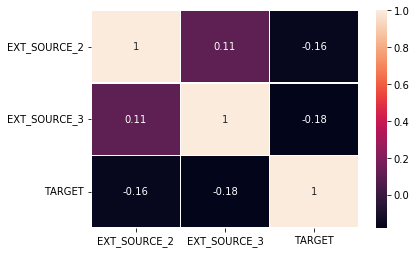

In [48]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(round(data[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2),
            linewidths=0.5, annot=True)
plt.show()

In [49]:
# Drop features
data = data.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'])

In [50]:
data.isna().sum().sort_values(ascending=False).head(20)

AMT_REQ_CREDIT_BUREAU_YEAR    0
NAME_INCOME_TYPE              0
DAYS_ID_PUBLISH               0
DAYS_REGISTRATION             0
DAYS_EMPLOYED                 0
DAYS_BIRTH                    0
REGION_POPULATION_RELATIVE    0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_TYPE_SUITE               0
CNT_FAM_MEMBERS               0
AMT_GOODS_PRICE               0
AMT_ANNUITY                   0
AMT_CREDIT                    0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
CODE_GENDER                   0
NAME_CONTRACT_TYPE            0
TARGET                        0
dtype: int64

## Numerical Variables Binning for Data Visualization

In [51]:
data.select_dtypes(include='float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Number of unique values
data.nunique().sort_values(ascending=False)

SK_ID_CURR                     307510
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
NAME_INCOME_TYPE                    8
NAME_TYPE_SU

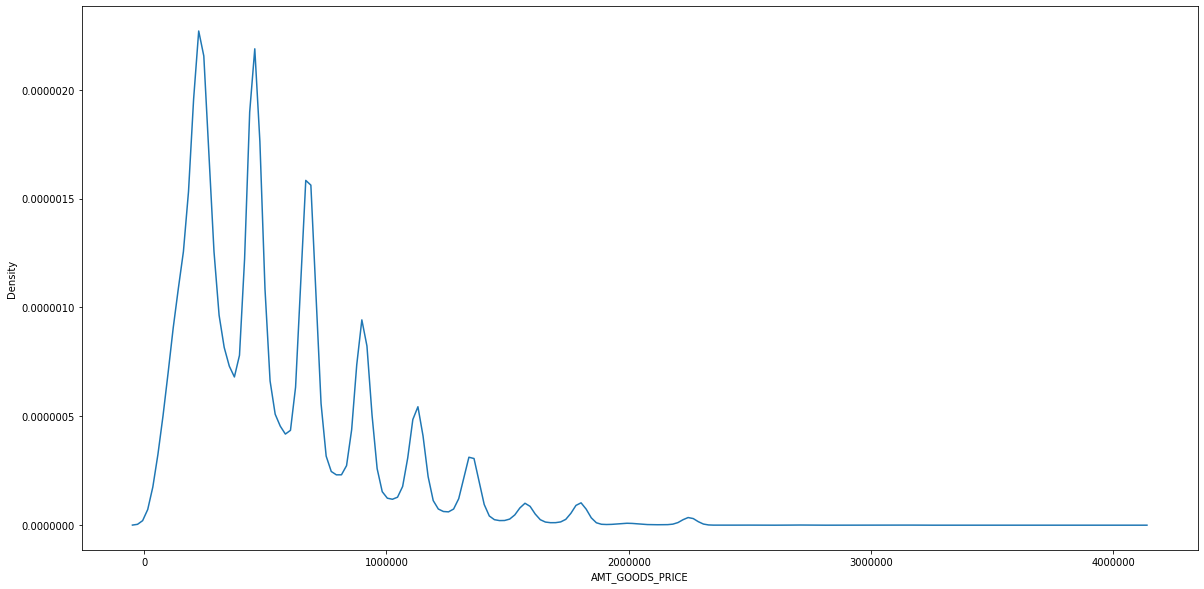

In [53]:
# KDE-plot
plt.figure(figsize=(20,10))
sns.kdeplot(data=data, x='AMT_GOODS_PRICE')
plt.show()

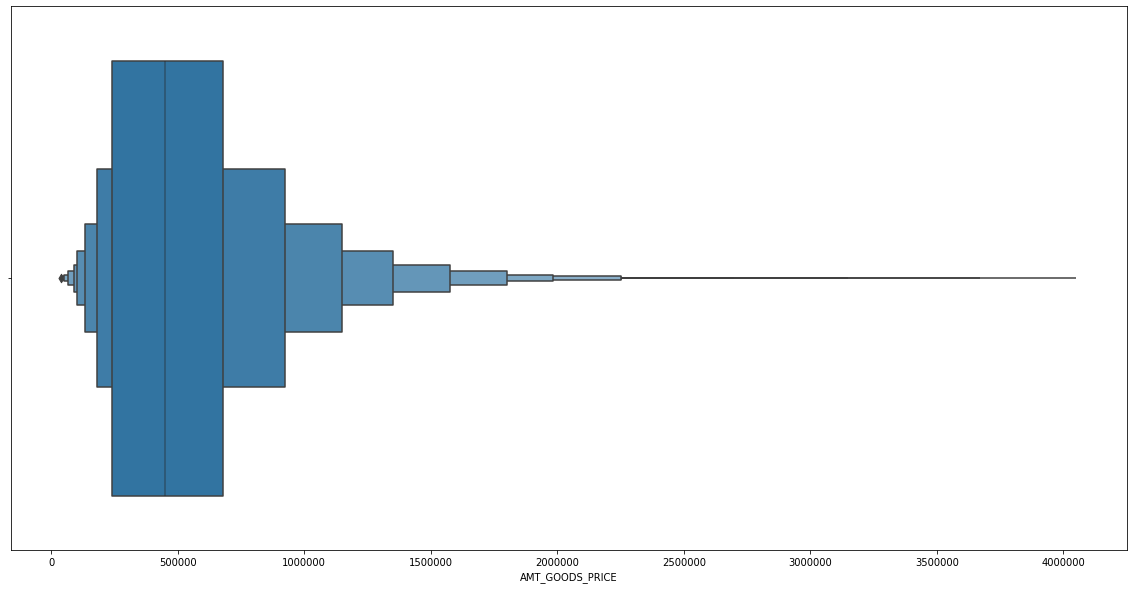

In [54]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=data, x='AMT_GOODS_PRICE')

In [55]:
# AMT_GOODS_PRICE
data['AMT_GOODS_PRICE'].quantile([0.1,0.25,0.50,0.75,0.90])

0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

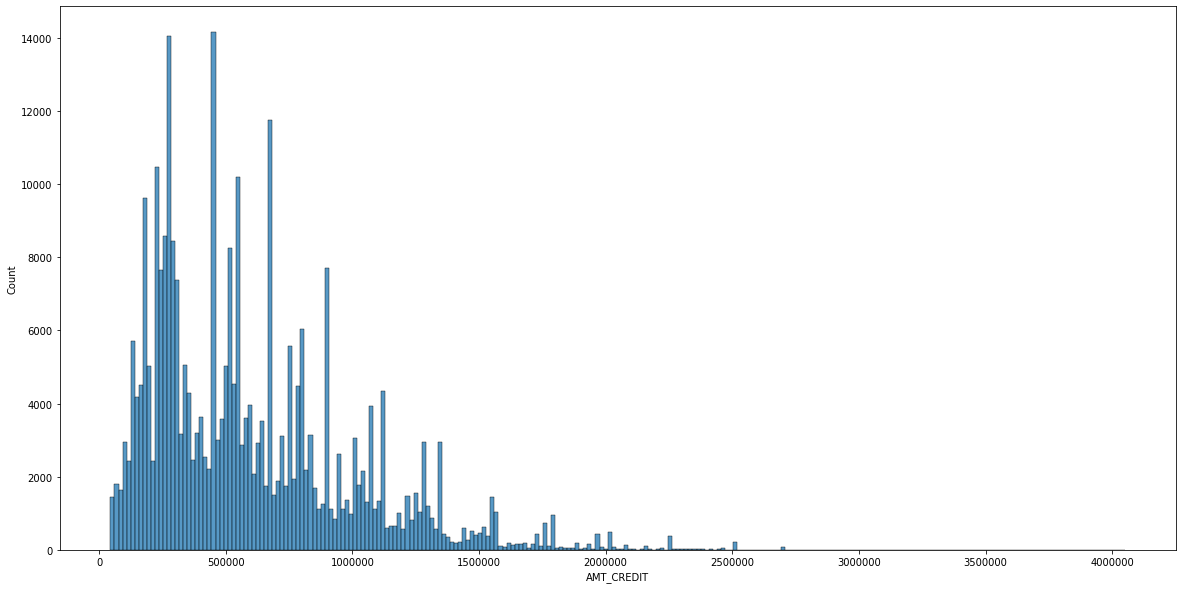

In [56]:
plt.figure(figsize=(20,10))
sns.histplot(data['AMT_CREDIT'])

In [57]:
data['AMT_CREDIT'].describe().loc[['min','max']]

min      45000.0
max    4050000.0
Name: AMT_CREDIT, dtype: float64

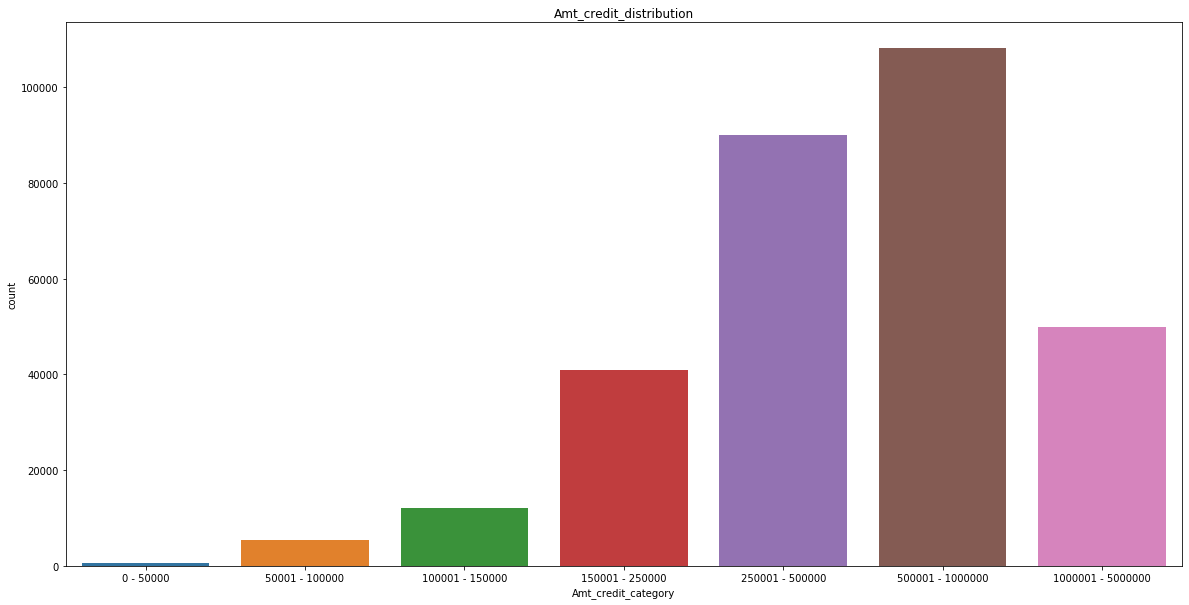

In [58]:
# Amt_Credit
labels= ['0 - 50000','50001 - 100000','100001 - 150000','150001 - 250000','250001 - 500000','500001 - 1000000', '1000001 - 5000000']
data['Amt_credit_category'] = pd.cut(data['AMT_CREDIT'], bins=[0,50000,100000,150000,250000,500000,1000000,5000000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_credit_category'])
plt.title('Amt_credit_distribution')
plt.show()

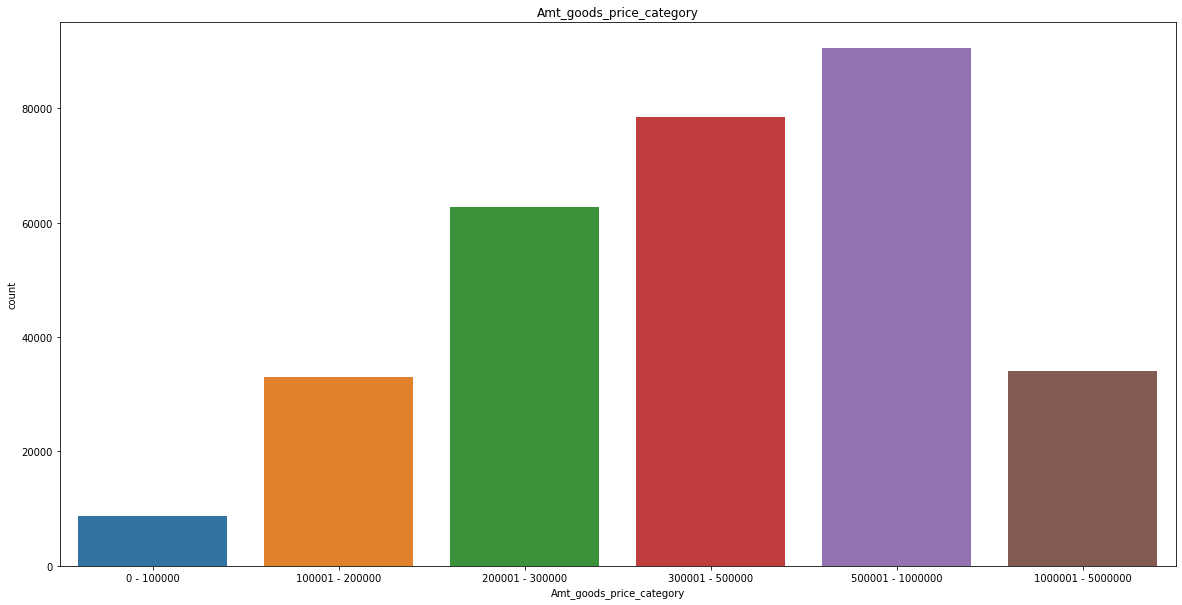

In [59]:
# AMT_GOODS_PRICE
labels= ['0 - 100000','100001 - 200000','200001 - 300000','300001 - 500000','500001 - 1000000','1000001 - 5000000']
data['Amt_goods_price_category'] = pd.cut(data['AMT_GOODS_PRICE'], bins=[0,100000,200000,300000,500000,1000000,5000000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_goods_price_category'])
plt.title('Amt_goods_price_category')
plt.show()

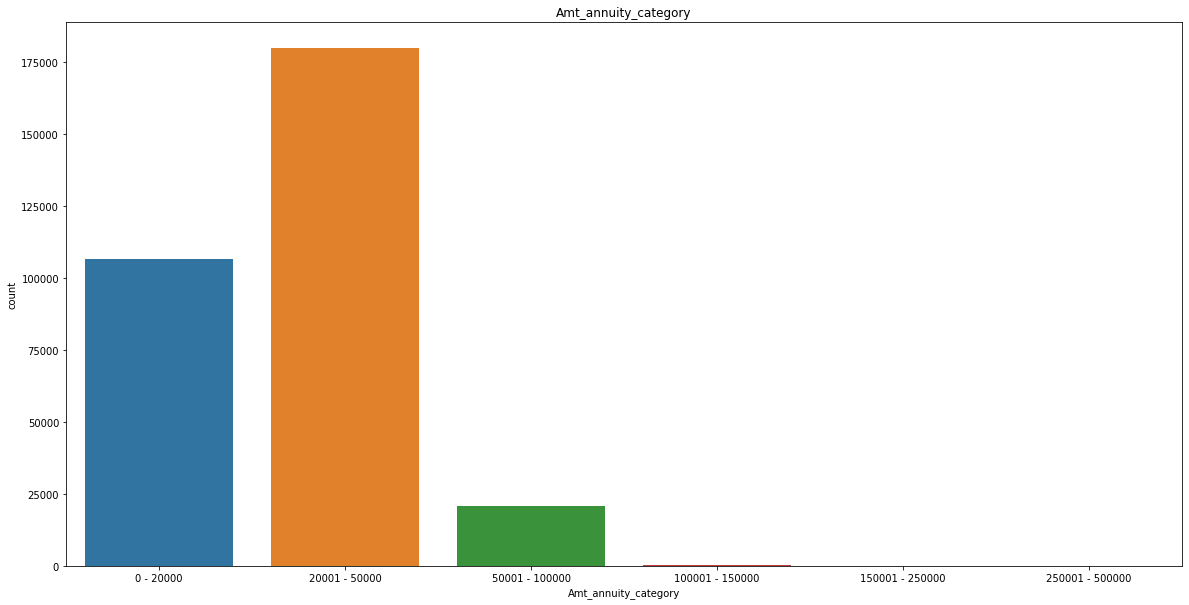

In [60]:
# AMT_ANNUITY
labels= ['0 - 20000','20001 - 50000','50001 - 100000','100001 - 150000','150001 - 250000','250001 - 500000']
data['Amt_annuity_category'] = pd.cut(data['AMT_ANNUITY'], bins=[0,20000,50000,100000,150000,250000,300000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_annuity_category'])
plt.title('Amt_annuity_category')
plt.show()

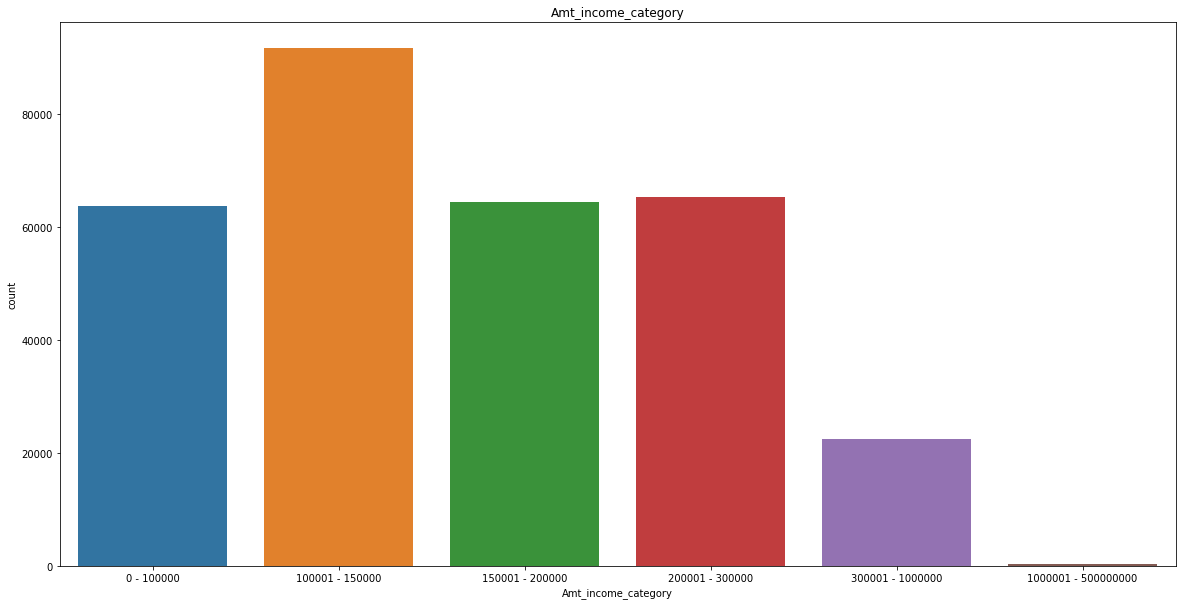

In [61]:
# AMT_INCOME_TOTAL
labels= ['0 - 100000','100001 - 150000','150001 - 200000','200001 - 300000','300001 - 1000000','1000001 - 500000000']
data['Amt_income_category'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[0,100000,150000,200000,300000,1000000,500000000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_income_category'])
plt.title('Amt_income_category')
plt.show()

## Categorical variables data visualization

In [62]:
# NAME_CONTRACT_TYPE
data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278231
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

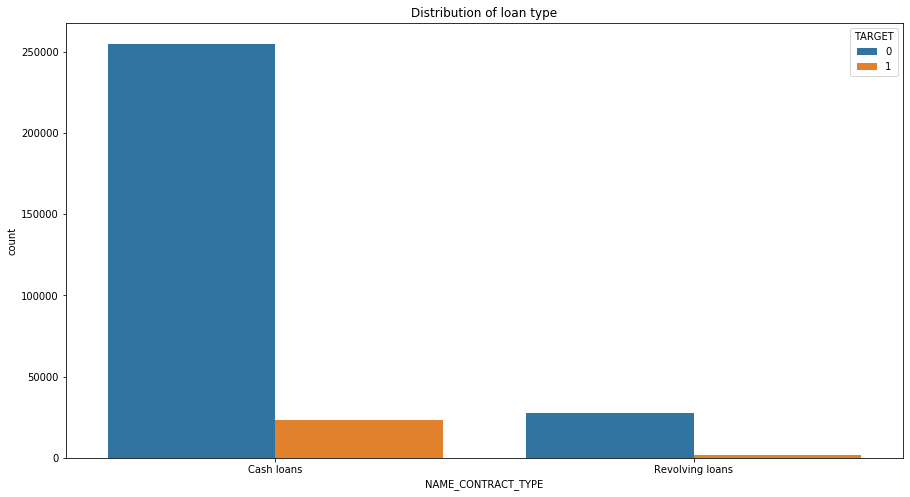

In [63]:
# Countplot
plt.figure(figsize=(15,8))
sns.countplot(x='NAME_CONTRACT_TYPE', data=data, hue='TARGET')
plt.title("Distribution of loan type")
plt.show()

##### By observation we can say that those who have taken cash loan defaulted the loan most.

In [64]:
# NAME_CONTRACT_TYPE
data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278231
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [65]:
# Dataframe for loan type with target
loan_with_target = data.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().reset_index(name='count')

loan_with_target['Percentage'] = round((loan_with_target['count']/len(data['NAME_CONTRACT_TYPE']))*100,2)
loan_with_target

,NAME_CONTRACT_TYPE,TARGET,count,Percentage
0,Cash loans,0,255010,82.93
1,Cash loans,1,23221,7.55
2,Revolving loans,0,27675,9.00
3,Revolving loans,1,1604,0.52


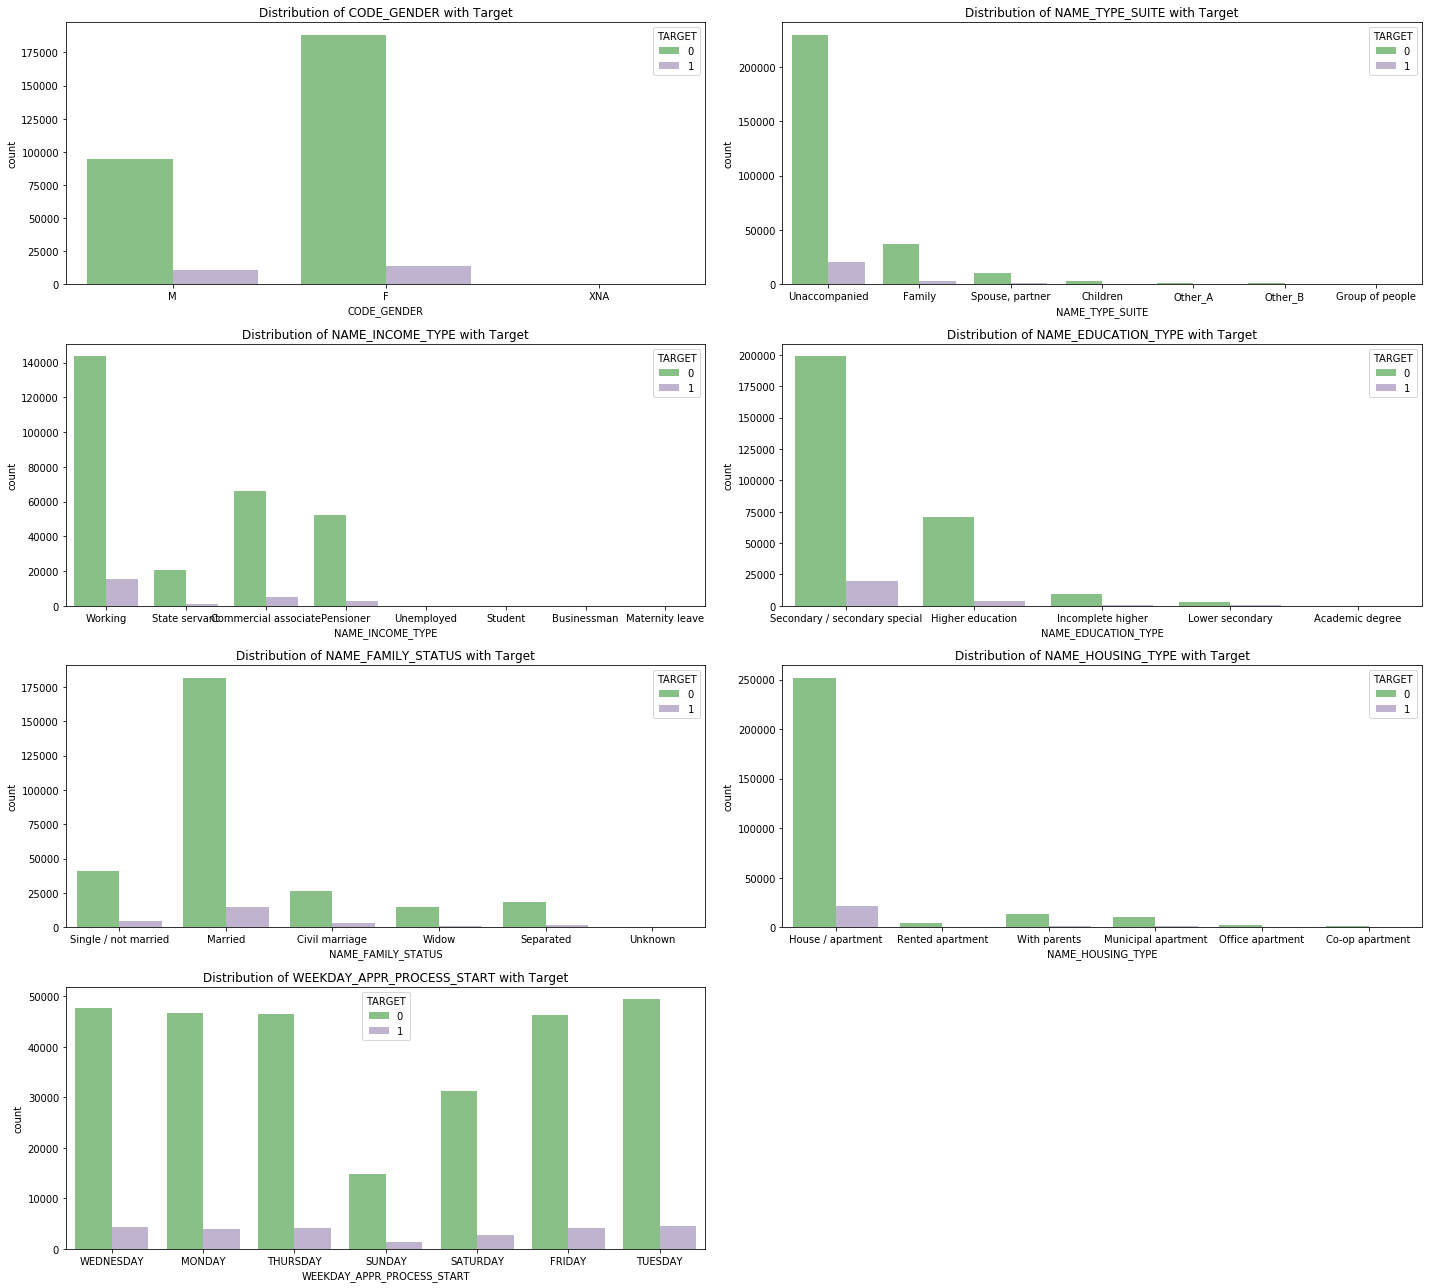

In [66]:
cols = ['CODE_GENDER', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']

# Countplot
plt.figure(figsize=(20,18))
for index, c in enumerate(cols):
    plt.subplot(4,2, index+1)
    sns.countplot(x=c, data=data, hue='TARGET', palette='Accent')
    plt.title(f"Distribution of {c} with Target")
    
plt.tight_layout()

#### By Close observation of each bar chart, we can come to following conclusions:
1. Females are less likely to default the loan than male.
2. Working client, Commercial associate and Pensioner have taken more loans.
3. Unaccompanied has taken most number of loans.
4. Married client has received more number of credits.
5. Most of the clients have their house apartment.
6. All days have equal number of application received, except sunday. 

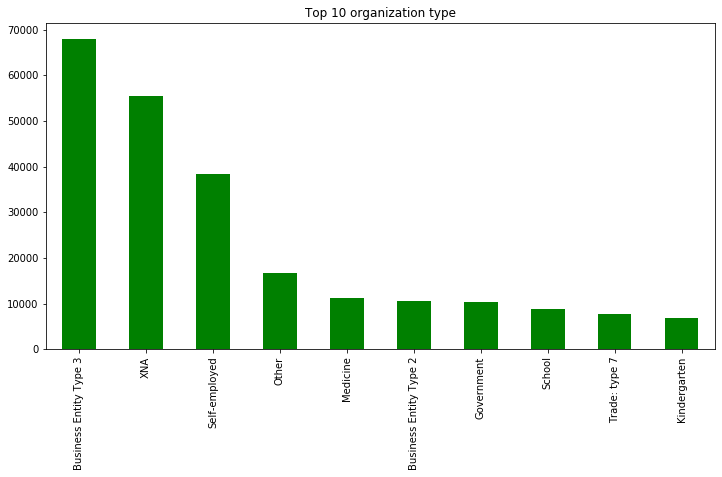

In [67]:
# Organization type
plt.figure(figsize=(12,6))
data['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='green')
plt.title("Top 10 organization type")
plt.show()

In [68]:
# Numeric features and categorical features
num_features = data.select_dtypes(include=['int', 'float']).columns
num_cat_features = data.select_dtypes(include=['int', 'float', 'category']).columns

In [69]:
data['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307510, dtype: int64

In [70]:
# Numeric dataframe
num_data = data[np.concatenate([num_features,np.array(['TARGET'])])]

defaulters = num_data[num_data['TARGET']==1]  # Dataframe for defaulters
repayers = num_data[num_data['TARGET']==0]   # Dataframe for non-defaulters

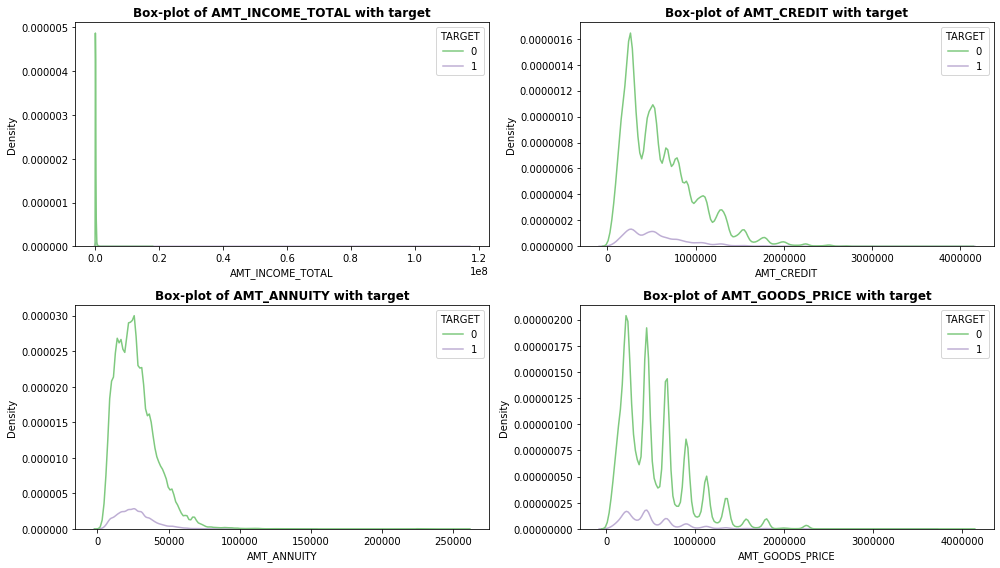

In [72]:
# Amt_features
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize=(14,8))
for index, k in enumerate(amt_var):
    plt.subplot(2,2, index+1)
    sns.kdeplot(x=k, data=num_data, hue='TARGET', palette='Accent')
    plt.title(f"Box-plot of {k} with target", fontweight='bold')
    
plt.tight_layout()
    

Observations:
1. Most of the defaulters are from high-income groups.
2. Most defaulters fall under the category of amt_credit between 0 to 1 million.
3. Annuity payment of 0 to 50000 have more number of defaults.
4. Amount goods price between o to 1 million have more number of defaults.

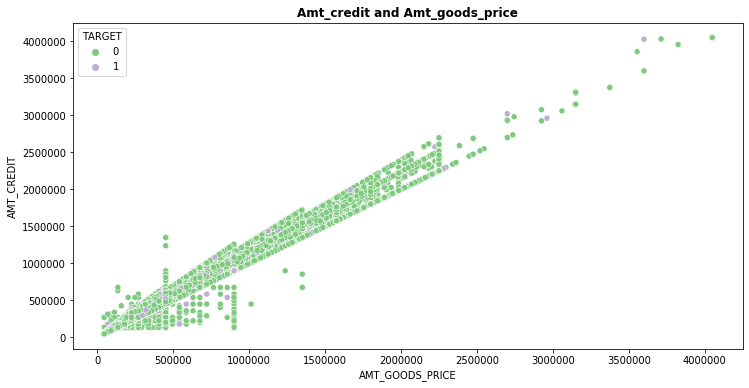

In [73]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=num_data, x='AMT_GOODS_PRICE', y='AMT_CREDIT', palette='Accent', hue='TARGET')
plt.title("Amt_credit and Amt_goods_price", fontweight='bold')
plt.show()

Here we can observe that Amt_goods_price and Amt_credit have linear relation. And, most of the defaulters are under 1 million level.

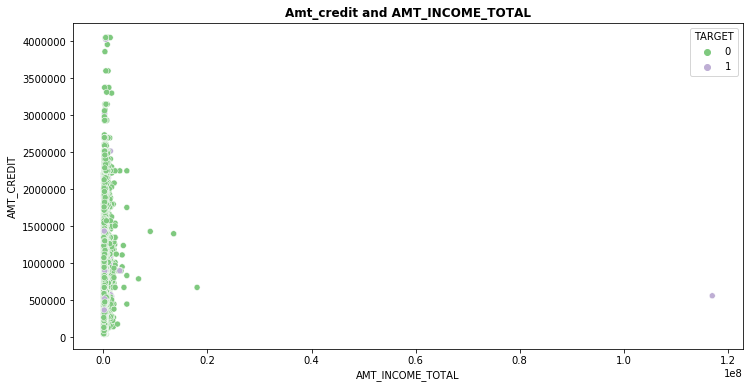

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=num_data, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', palette='Accent', hue='TARGET')
plt.title("Amt_credit and AMT_INCOME_TOTAL", fontweight='bold')
plt.show()

People with income less than 1 million is taking more number of loans. And, people who got credit/loans less than 150,000 are more likely to default.

## Final Observations:
1. Female loan has less default rate. So, the bank should give a little bit priority to females.
2. Those clients who do not have any accompany should be focused.
3. Safest segementation of employment are workers, commercial associates and pensioners.
4. Client who have the higher education should be given more loans.
5. Married clients are safer than unmarried.
6. People having house/apartment are safer to provide loans.
7. Low-skill laborers and drivers should be given less priority as they have high probability of making
   defaults.
8. People having income less than 1 million and taking loans near to 1 million have higher chance of      defaults. So, should not be given focus.
9. Married couples having children less than five are safe for providng loans.
10. Client having annuity less than 100K are safer side for the bank.